In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Decomposition (분해)

*   하나의 큰 행렬을 여러개의 작은 행렬로 분해하는 것.

*   분해 과정에서 중요한 정보 (latents)만 유지하게 되는 것을 목표로 함.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
faces, _ = fetch_olivetti_faces(return_X_y =True, shuffle = True)

print(faces.shape)

(400, 4096)


In [ ]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2, 3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(faces[i], (64,64)), cmap = plt.cm.gray)

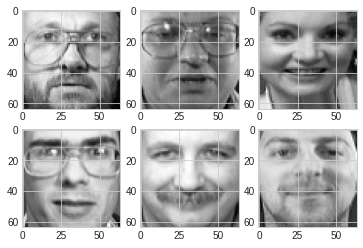

In [ ]:
show_faces(faces)

#   Principal Component Analysis (PCA)

*   주성분 분석 ( 분산을 최대로 하는 경계를 탐색하고, 주 선과 보조 선을 탐색 )

*   주성분을 기반으로 저차원으로 사상 (mapping)

*   즉, 데이터의 주요 특징을 탐색

In [ ]:
model = PCA(n_components = 2 * 3, random_state = 0)
model.fit(faces)

faces_components = model.components_

transformed_faces = model.transform(faces)

print(faces.shape)
print(faces_components.shape)
print(transformed_faces.shape)

(400, 4096)
(6, 4096)
(400, 6)


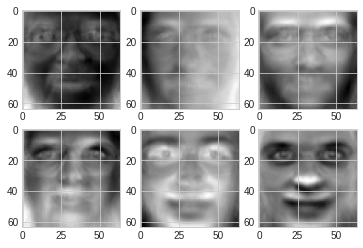

In [ ]:
show_faces(faces_components)

# Incremental PCA

*   sci-kit learn에서 제공하는 PCA는 SVD 알고리즘 실행을 위해 전체 데이터를 메모리에 올려야함.

*   Minibatch 형태로 PCA를 실행하는 것이 Incremental PCA


In [ ]:
model = IncrementalPCA(n_components= 2 * 3)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

(400, 4096)
(6, 4096)


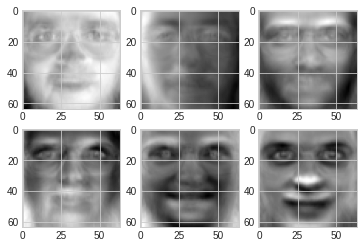

In [ ]:
show_faces(faces_components)

# Kernel PCA

*   비선형 특성을 커널형 형태로 부여되었을 때

*   차원 축소를 위한 비선형 투영


In [ ]:
model = KernelPCA(n_components = 2 * 3, kernel = 'rbf', random_state = 0)
model.fit(faces)

# faces_components = model.components_        # 커널 PCA에선 제공하지 않음.
transformed_faces = model.transform(faces)

print(faces.shape)
# print(faces_components.shape)
print(transformed_faces.shape)

(400, 4096)
(400, 6)


# Sparse PCA

*   주성분들이 모든 입력 변수들의 선형 결합으로 나타내 진다는 PCA의 단점을 해결하기 위해 제안됨.

*   희소 주성분 분석은 몇 개의 변수들만으로 선형 결합을 이루어 주성분을 탐색함.

(400, 4096)
(6, 4096)


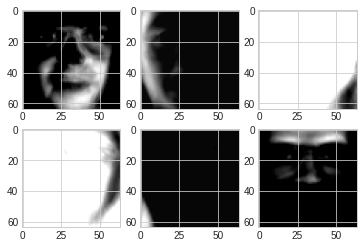

In [ ]:
model = SparsePCA(n_components = 2 * 3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Truncated Singular Value Decomposition (Truncated SVD)

PCA는 정방 행렬인 경우에만 분해가 가능한 반면, SVD는 정방행렬 뿐만 아니라 행과 열이 다른 경우에도 분해가 가능하다. 

PCA는 밀집 행렬(Dense Matrix)에 대해서만 변환이 가능한 반면, SVD는 희소 행렬(Sparse Matrix)에 대해서도 변환이 가능하다. 

▶ 따라서 sci-kit learn 에서 제공하는 PCA는 내부적으로 SVD에 기반해 사용한다.


전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적다.

*  Truncated SVD는  특이값이 0인 부분을 모두 제거하고 차원을 줄인다.



(400, 4096)
(6, 4096)


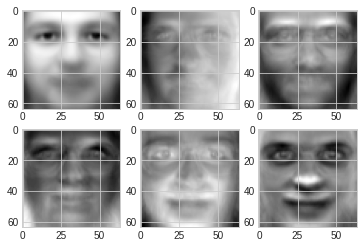

In [ ]:
model = TruncatedSVD(n_components = 2 * 3, random_state= 0 )
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Dictionary Learning

*   Sparse code를 사용해 데이터를 가장 잘 설명할 수 있는 dictionary를 탐색

*   Sparse coding은 overcomplete basis vector (기저 벡터)를 기반으로 데이터를 효율적으로 표현하기 위해 개발

*   기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타난다. 

(400, 4096)
(6, 4096)


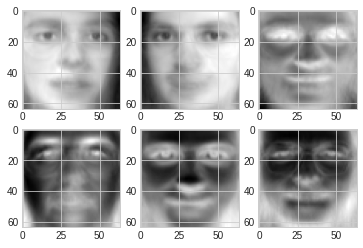

In [ ]:
model = DictionaryLearning(n_components = 2*3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Factor Analysis

*   Factor anlaysis (요인 분석)은 변수들 간의 상관관계를 고려하여 상관관계에 내재된 개념인 요인들을 추출해내는 분석 방법

*   요인 분석은 변수들 간의 상관계수를 고려해서 서로 유사한 변수들 끼리 묶어주는 방법

*   PCA에서는 오차(error)를 고려하지 않고, Factor Analysis에서는 오차(error)를 고려

(400, 4096)
(6, 4096)


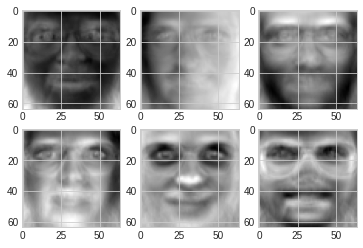

In [ ]:
model = FactorAnalysis(n_components = 2*3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Independent Component Analysis (ICA)

*   Independent component analysis (ICA, 독립 성분 분석)은 다변량의 신호를 통계적으로 '독립적인' 하부 성분으로 분리하는 계산 방법

*   ICA는 주성분을 이용하는 점에선 PCA와 유사하지만, '데이터를 가장 잘 설명하는 축'을 탐색하는 PCA와는 달리 '가장 독립적인 축', '독립성이 최대가 되는 벡터'를 탐색한다. 

(400, 4096)
(6, 4096)


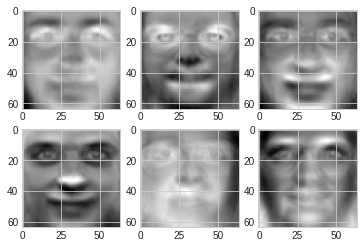

In [ ]:
model = FastICA(n_components = 2*3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Non-negative Matrix Factorization (NMF)

*   Non-negative Matrix Factorization (NMF, 음수 미포함 행렬 분해)는 음수를 포함하지 않는 행렬 V를 음수를 포함하지 않는 행렬 W와 H의 곱으로 분해하는 알고리즘



(400, 4096)
(6, 4096)


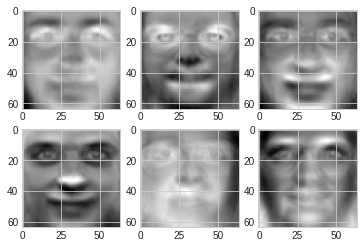

In [ ]:
mmodel = NMF(n_components = 2*3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Latent Dirichlet Allocation (LDA)

* Latent Disichlet Allocation (LDA, 잠재 디리클레 할당)은 '이산 자료'들에 확률적 생성 모형

*  분포에 따하 잠재적인 의미 구조를 파악하는 방식


*  문서 분석 등 topic modeling 분야에서 주로 사용

(400, 4096)
(6, 4096)


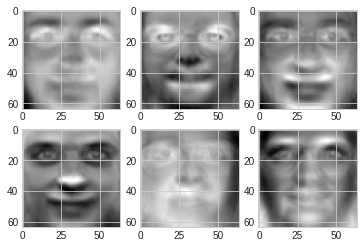

In [ ]:
mmodel = LatentDirichletAllocation(n_components = 2*3, random_state = 0)
model.fit(faces)

faces_components = model.components_

print(faces.shape)
print(faces_components.shape)

show_faces(faces_components)

# Linear Discriminant Analysis (LDA)

*   Linear Discriminant Analysis는 PCA와 유사하게 입력 데이터를 저차원 공간에 투영

*   지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

*   클래스 값을 부여해야함. 

In [ ]:
mmodel = LinearDiscriminantAnalysis(n_components = 2*3, random_state = 0)
model.fit(X, y)